In [1]:
import pandas as pd
df = pd.read_csv('/content/Student_performance_data _.csv')

### Exploratory Data Analysis

In [10]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,0.472919,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,1.118086,2.0
1,1002,1.362944,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1.242374,1.0
2,1003,-1.307132,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,-1.960277,4.0
3,1004,0.472919,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,0.161790,3.0
4,1005,0.472919,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,-0.675573,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,1.362944,1,0,3,0.160762,-1.481445,0,4,1,0,0,0,1.693315,0.0
2388,3389,0.472919,0,0,1,-0.387285,-1.245196,1,4,0,1,0,0,1.500565,4.0
2389,3390,-0.417106,1,0,2,-0.524895,0.644796,0,2,0,0,0,1,-0.834845,2.0
2390,3391,-0.417106,1,1,0,0.467950,0.290422,0,2,0,1,1,0,-0.112452,1.0


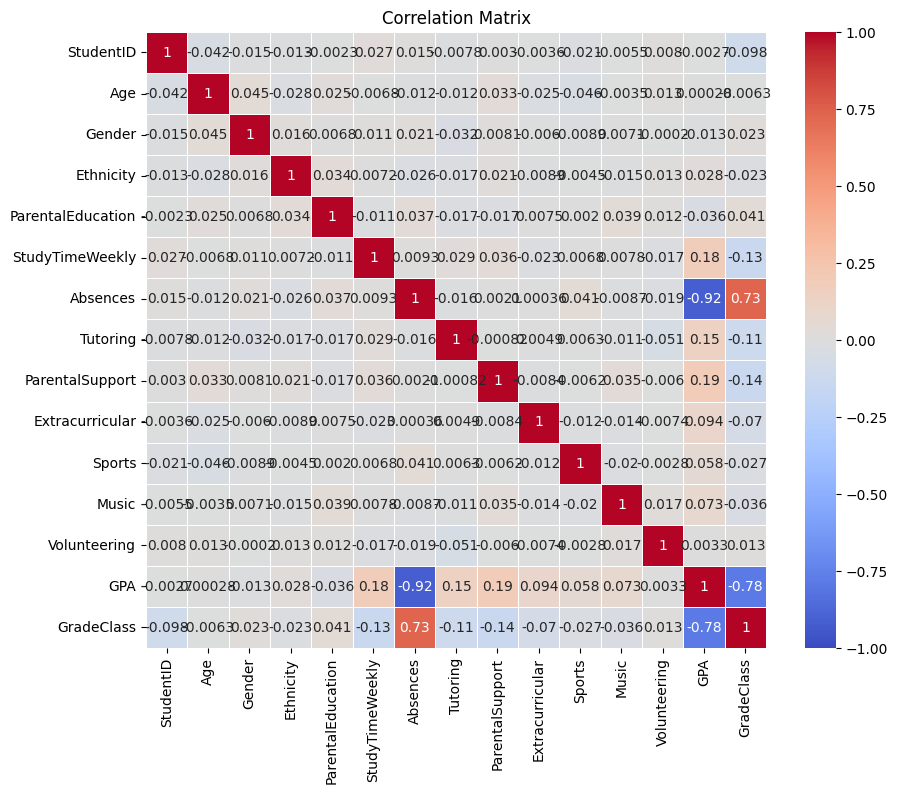

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### PreProcessing and Modelling

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [26]:
X = df.drop(columns=['StudentID', 'GPA', 'GradeClass'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Modelling

In [27]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress CatBoost output
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Model: Decision Tree
Accuracy: 0.5863509749303621
              precision    recall  f1-score   support

         0.0       0.18      0.18      0.18        33
         1.0       0.32      0.36      0.34        80
         2.0       0.43      0.44      0.43       121
         3.0       0.39      0.36      0.38       127
         4.0       0.81      0.80      0.81       357

    accuracy                           0.59       718
   macro avg       0.43      0.43      0.43       718
weighted avg       0.59      0.59      0.59       718

[[  6  13   6   3   5]
 [ 13  29  25   5   8]
 [  4  24  53  28  12]
 [  3   9  28  46  41]
 [  8  15  12  35 287]]


Model: Random Forest
Accuracy: 0.692200557103064
              precision    recall  f1-score   support

         0.0       0.50      0.09      0.15        33
         1.0       0.49      0.46      0.47        80
         2.0       0.50      0.58      0.54       121
         3.0       0.51      0.41      0.45       127
         4.0       0.85

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: CatBoost
Accuracy: 0.7116991643454039
              precision    recall  f1-score   support

         0.0       0.50      0.18      0.27        33
         1.0       0.55      0.54      0.54        80
         2.0       0.56      0.60      0.58       121
         3.0       0.53      0.47      0.50       127
         4.0       0.85      0.92      0.89       357

    accuracy                           0.71       718
   macro avg       0.60      0.54      0.56       718
weighted avg       0.70      0.71      0.70       718

[[  6  13   6   4   4]
 [  3  43  26   2   6]
 [  0  18  72  25   6]
 [  1   2  24  60  40]
 [  2   2   0  23 330]]




Decision Tree accuracy: 0.58
Random Forest accuracy: 0.70
Gradient Boosting accuracy: 0.69
AdaBoost accuracy: 0.63
K-Nearest Neighbors accuracy: 0.56
Logistic Regression accuracy: 0.69
SGD Classifier accuracy: 0.60
Support Vector Machine accuracy: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBoost accuracy: 0.70
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 12
[LightGBM] [Info] Start training from score -3.118906
[LightGBM] [Info] Start training from score -2.181224
[LightGBM] [Info] Start training from score -1.824549
[LightGBM] [Info] Start training from score -1.763489
[LightGBM] [Info] Start training from score -0.673040
LightGBM accuracy: 0.70
CatBoost accuracy: 0.71


<ipython-input-30-570344dd1307>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')


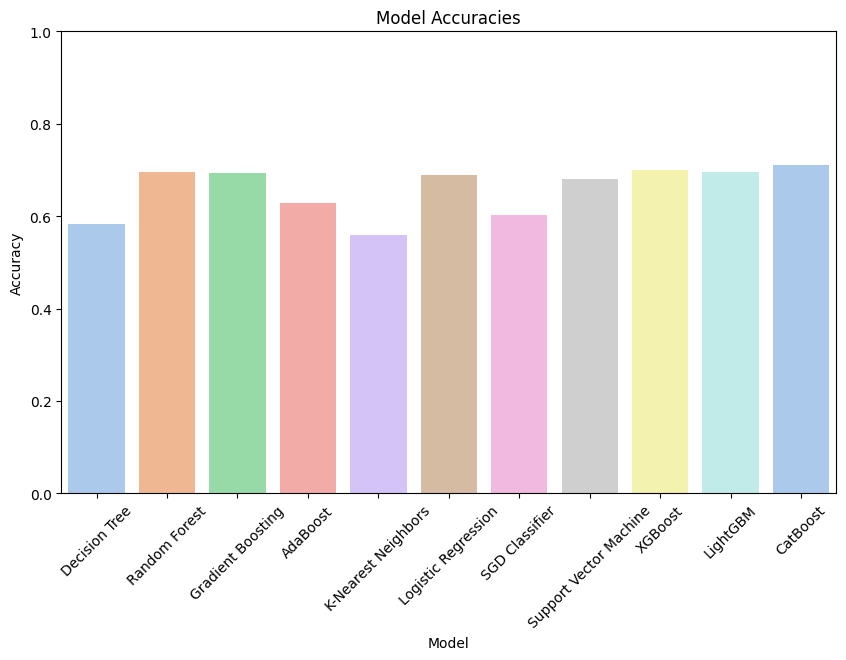

In [30]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

#### Trying improve the accuracy by tuning parameter

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best cross-validation F1-score: 0.7378
Accuracy = 0.7103, F1-score = 0.5497
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.18      0.28        33
         1.0       0.52      0.53      0.52        80
         2.0       0.52      0.55      0.53       121
         3.0       0.55      0.49      0.52       127
         4.0       0.86      0.94      0.90       357

    accuracy                           0.71       718
   macro avg       0.61      0.54      0.55       718
weighted avg       0.70      0.71      0.70       718



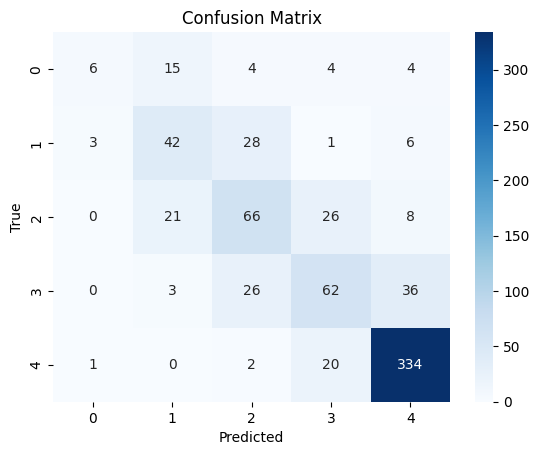

In [32]:
model = CatBoostClassifier(verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()